## Load jpg image file using tensorflow

 - load_jpg_with_tf.ipynb 을 통해 disk상에 있는 이미지를 queue에 넣어 데이터를 불러오는 방법을 연습함.
 - 이번에는 load_jpg.py 내에 함수로 만들어 그 함수를 이용하여 각 클래스별로 이미지를 불러오는 방법을 보여줌.
 - 잘 불러와졌는지 확인하기 위해 이미지를 시각화함.

### 필요한 모듈 불러오기

In [1]:
import tensorflow as tf
import numpy as np
import os, sys

### image load 및 시각화에 필요한 함수 불러오기

In [2]:
from load_jpg import img_reader_filename_per_class
from plotting_image import show_images

In [3]:
help(img_reader_filename_per_class)

Help on function img_reader_filename_per_class in module load_jpg:

img_reader_filename_per_class(filename_paths, batch_size_per_class, resized_shape=[224, 224], rgb2gray=True, num_preprocess_threads=1, min_queue_examples=16)
    Build image reader filename per class.
    
    Args:
      filename_paths {[list]} -- 
        [directories,
        format :
          .
          |-- data_folder
              |-- class1 name
                  |-- 0.jpg
                  |-- 1.jpg ...
              |-- class2 name
                  |-- 0.jpg
                  |-- 1.jpg ...
              |-- class3 name
                  |-- 0.jpg
                  |-- 1.jpg ...
        ]
      batch_size_per_class {[int]} -- [batch size per class. if you enter 4 and number of class is 3, total batch size is that 4*3 = 12]
      resized_shape {[list]} -- [shapes to resize (height, width and channel of image)] (default: {[224, 224, 1]})
      rgb2gray {[boolean]} -- [whether rgb to gray scaling] (default: {Tr

In [4]:
help(show_images)

Help on function show_images in module plotting_image:

show_images(images, cols=1, titles=None)
    Display a list of images in a single figure with matplotlib.
    
    Args:
      images {[ndarray]} -- List of np.arrays compatible with plt.imshow.
      cols {(int)} -- Number of columns in figure (number of rows is set to np.ceil(n_images/float(cols))). (default: {1})
      titles {(list)}: List of titles corresponding to each image. Must have the same length as titles. (default: {None})



In [5]:
images_0, images_1, images_2 = img_reader_filename_per_class(
    filename_paths=["./data/0/*", "./data/1/*", "./data/2/*"],
    batch_size_per_class=1
)

In [6]:
# Start a new session to show example output.
with tf.Session() as sess:
    # Required to get the filename matching to run.
    sess.run(tf.local_variables_initializer())

    # Coordinate the loading of image files.
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)

    for _ in range(2):
        # Get an image tensor and print its value.
        image_0_tensor, image_1_tensor, image_2_tensor = sess.run([images_0, images_1, images_2])
        print(image_0_tensor.shape, " | ", image_1_tensor.shape, " | ", image_2_tensor.shape)

    # Finish off the filename queue coordinator.
    coord.request_stop()
    coord.join(threads)

(1, 224, 224, 1)  |  (1, 224, 224, 1)  |  (1, 224, 224, 1)
(1, 224, 224, 1)  |  (1, 224, 224, 1)  |  (1, 224, 224, 1)


### class 0 image

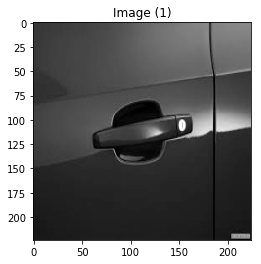

In [7]:
show_images(image_0_tensor[..., 0])

### class 1 image

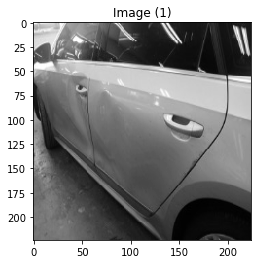

In [8]:
show_images(image_1_tensor[..., 0])

### class 2 image

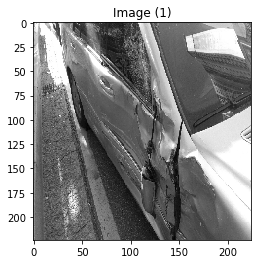

In [9]:
show_images(image_2_tensor[..., 0])